In [3]:
import os
os.getcwd()


'C:\\Users\\User'

In [4]:
import pandas as pd

In [5]:
data= pd.read_csv("Data1.csv",usecols=[0,1,3,5,7,9,11,13,15,17,19,21,23,25,27],nrows=7369)

In [6]:
data.head()

,Time,Front Bearing D,Front Bearing C,Inner Housing Front,Inner Housing Mid,Inner Housing Back,Back Bearing B,Back Bearing A,HousingA,HousingB,Support,Room Temperature,Deformation,Base_Deformation,Speed
0,1,30.28,30.25,30.30,30.17,30.13,30.35,30.12,30.03,30.42,28.2,29.83,-0.11,-2.10,3000
1,4,30.47,30.27,30.39,30.05,29.96,30.26,30.29,30.05,30.32,28.3,29.89,-5.16,-28.53,3000
2,7,30.18,30.31,29.99,30.13,29.98,30.20,30.25,30.15,30.24,28.3,29.91,-5.98,-4.86,3000
3,10,30.08,30.29,30.45,30.38,30.22,30.19,30.24,29.85,30.67,28.3,30.02,-6.22,1.45,3000
4,13,30.46,30.09,29.86,30.04,29.92,30.41,30.38,30.25,30.55,28.2,29.90,-6.22,1.49,3000


In [7]:
data.tail()

,Time,Front Bearing D,Front Bearing C,Inner Housing Front,Inner Housing Mid,Inner Housing Back,Back Bearing B,Back Bearing A,HousingA,HousingB,Support,Room Temperature,Deformation,Base_Deformation,Speed
7364,21989,32.76,33.17,33.09,33.12,33.35,33.59,33.33,32.43,32.20,28.4,30.40,0.55,-35.14,3000
7365,21992,32.54,33.25,33.31,33.50,33.42,33.62,33.29,32.44,32.18,28.4,30.36,0.62,-35.11,3000
7366,21995,32.93,33.04,33.44,33.25,33.20,33.57,33.38,32.20,32.28,28.3,30.33,0.63,-35.14,3000
7367,21998,33.10,32.92,32.74,33.47,33.07,33.45,33.35,32.40,32.27,28.4,30.59,0.66,-35.22,3000
7368,22001,32.81,32.91,33.28,33.28,33.37,33.62,33.47,32.46,32.16,28.3,30.26,0.62,-35.11,3000


In [8]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import datasets
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7369 entries, 0 to 7368
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Time                 7369 non-null   int64  
 1   Front Bearing D      7369 non-null   float64
 2   Front Bearing C      7369 non-null   float64
 3   Inner Housing Front  7369 non-null   float64
 4   Inner Housing Mid    7369 non-null   float64
 5   Inner Housing Back   7369 non-null   float64
 6   Back Bearing B       7369 non-null   float64
 7   Back Bearing A       7369 non-null   float64
 8   HousingA             7369 non-null   float64
 9   HousingB             7369 non-null   float64
 10  Support              7369 non-null   float64
 11  Room Temperature     7369 non-null   float64
 12  Deformation          7369 non-null   float64
 13  Base_Deformation     7369 non-null   float64
 14  Speed                7369 non-null   int64  
dtypes: float64(13), int64(2)
memory usage:

In [10]:
data.describe()

,Time,Front Bearing D,Front Bearing C,Inner Housing Front,Inner Housing Mid,Inner Housing Back,Back Bearing B,Back Bearing A,HousingA,HousingB,Support,Room Temperature,Deformation,Base_Deformation,Speed
count,7369.000000,7369.000000,7369.000000,7369.000000,7369.000000,7369.000000,7369.000000,7369.000000,7369.000000,7369.000000,7369.000000,7369.000000,7369.000000,7369.000000,7369.0
mean,11000.934727,32.590873,32.704436,32.647567,32.766721,32.741713,33.046599,32.949655,32.095461,31.981818,28.374189,30.397293,0.973722,-22.590186,3000.0
std,6352.120340,0.596072,0.647076,0.752351,0.791243,0.813289,0.810550,0.816176,0.632891,0.450723,0.099340,0.173704,0.898153,7.840940,0.0
min,1.000000,30.080000,30.030000,29.760000,29.930000,29.860000,30.000000,29.980000,29.570000,30.130000,28.000000,29.600000,-6.360000,-35.220000,3000.0
25%,5501.000000,32.480000,32.600000,32.490000,32.600000,32.560000,32.860000,32.750000,31.960000,31.870000,28.300000,30.300000,0.470000,-29.090000,3000.0
50%,11001.000000,32.810000,32.960000,32.910000,33.070000,33.060000,33.380000,33.300000,32.330000,32.110000,28.400000,30.410000,0.810000,-23.310000,3000.0
75%,16501.000000,32.960000,33.090000,33.120000,33.260000,33.250000,33.550000,33.460000,32.490000,32.260000,28.400000,30.510000,1.600000,-16.280000,3000.0
max,22001.000000,33.450000,33.720000,33.900000,33.910000,33.850000,34.200000,34.040000,33.260000,32.980000,28.600000,30.920000,2.420000,1.510000,3000.0


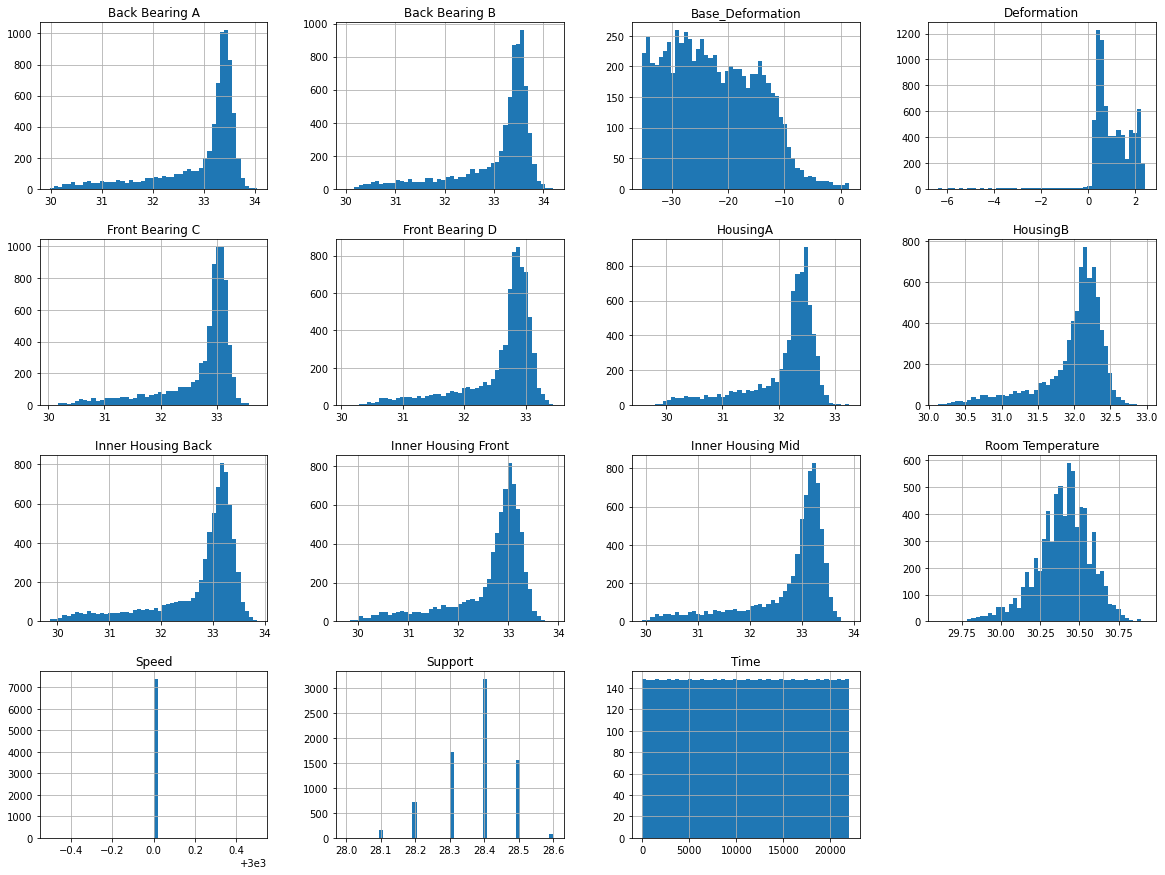

In [11]:
data.hist(bins=50,figsize=(20,15))
plt.show()

In [13]:
import numpy as np
# to make this notebook's output identical at every run
np.random.seed(42)

In [19]:
import numpy as np
#將資料分為測試組跟訓練組
# For illustration only. Sklearn has train_test_split()
def split_train_test(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

In [15]:
train_set, test_set = split_train_test(data, 0.2)#20%的資料分為測試組
len(train_set)

5896

In [16]:
len(test_set)

1473

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import datasets
from sklearn.model_selection import train_test_split

In [24]:
#y=train_set.Deformation
#y2=test_set.Deformation
#X=train_set
x_train=train_set
y_train=train_set.Deformation
x_test=test_set
y_test=test_set

In [25]:
from sklearn.ensemble import RandomForestRegressor
model=RandomForestRegressor()
predict=model.fit(X,y).predict(test_set)

In [26]:
predict

array([0.59, 1.81, 0.4 , ..., 0.89, 0.38, 0.4 ])

In [27]:
RandomForestClassifier.score()

TypeError: score() missing 3 required positional arguments: 'self', 'X', and 'y'